In [21]:
import os
import numpy as np
import networkx as nx

from pathlib import Path
from matplotlib import pyplot as plt

%matplotlib inline

# Visualize explanations

In [59]:
dataset_name = 'HOUSE_CLIQ' # replace with your dataset name
graph_number = 683 # replace with your desired graph number

## Visualize the original graph

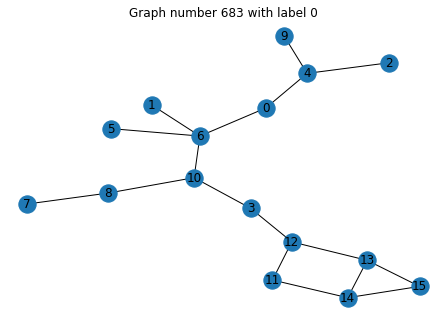

In [60]:
dataset_path = Path('data') / dataset_name
for name in os.listdir(str(dataset_path)):
    if not name.endswith('gexf'):
        continue
    if name.split('.')[0] == str(graph_number):
        graph = nx.read_gexf(dataset_path/name)
        label = name.split('.')[1]
        break
pos = nx.kamada_kawai_layout(graph)
nx.draw(graph, pos=pos, with_labels=True)
_ = plt.title(f'Graph number {graph_number} with label {label}')

## Visualize explanations

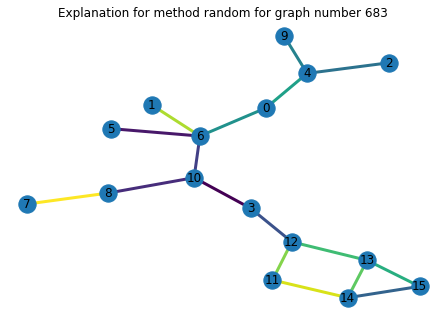

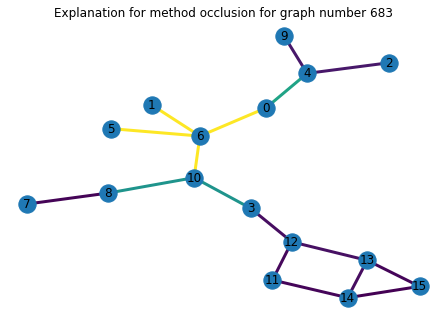

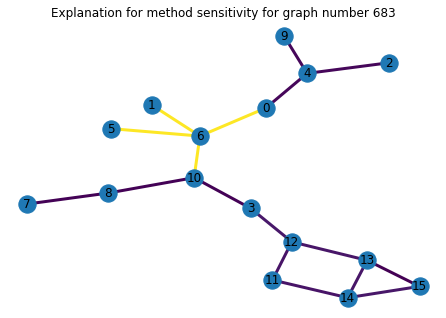

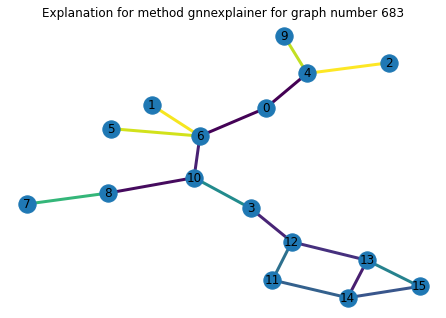

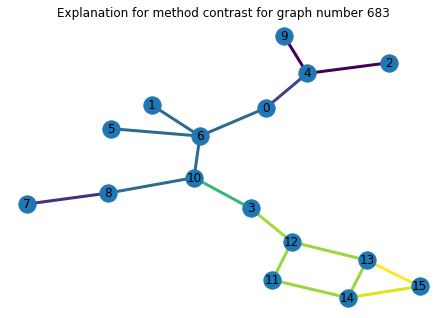

In [61]:
def mask_to_edge(g, masked_adj):
    edge_importance = {}
    for u, v in g.edges():
        u = int(u)
        v = int(v)
        edge_importance[(u, v)] = masked_adj[u, v]
    return edge_importance

explanation_methods = ['random','occlusion','sensitivity','gnnexplainer','contrast']
for method in explanation_methods:
    explain_path = Path('explanations') / method
    edge_importance = None
    if explain_path.exists():
        for name in os.listdir(str(explain_path)):
            if not name.endswith('npy'):
                continue
            if name.split('.')[0] == str(graph_number):
                edge_importance = mask_to_edge(graph, np.load(explain_path/name))
                break
    if edge_importance is None:
        print(f"Didn't find explanation for method {method}")
        continue
    edge_color = [edge_importance[int(u),int(v)] for u,v in graph.edges()]
    nx.draw(graph,
            pos=pos,
            edge_color=edge_color,
            with_labels=True,
            width=3)
    plt.title(f'Explanation for method {method} for graph number {graph_number}')
    plt.show()